In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [153]:
df = pd.read_csv("dataset3_l5.csv", delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   object
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   object
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   object
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   object
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   object
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   object
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   object
 7   Age (day)                                              1030 non-null   int64 
 8   Concrete compressive strength(MPa, megapascals)        1030

In [154]:
df = df.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [155]:
def replace_comma(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

df = df.applymap(replace_comma)
X = df.values

C:\Users\opana\AppData\Local\Temp\ipykernel_1980\1704696300.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(replace_comma)


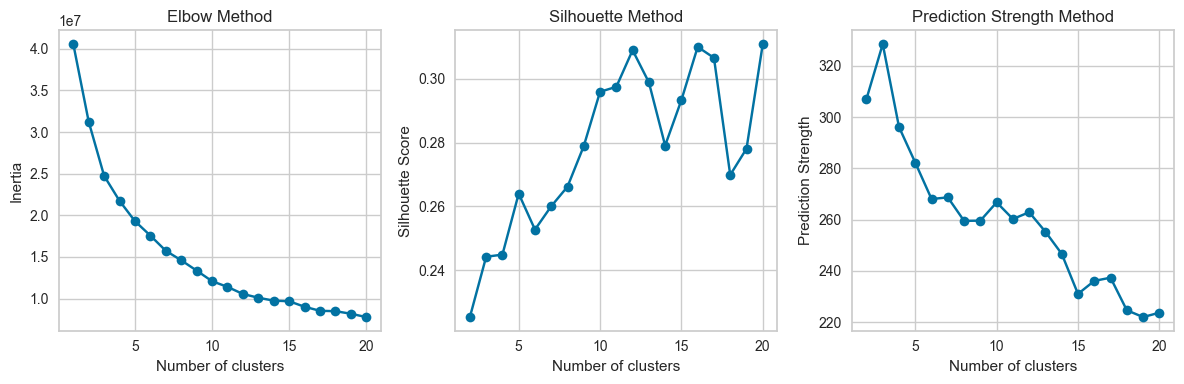

In [156]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics

# Elbow Method
elbow_scores = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X)
    elbow_scores.append(kmeans.inertia_)

# Silhouette Method
silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Prediction Strength Method
ps_scores = []
for i in range(2, 21):
    ps = metrics.calinski_harabasz_score(X, KMeans(n_clusters=i, init='random', random_state=42).fit_predict(X))
    ps_scores.append(ps)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(1, 21), elbow_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 3, 2)
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.subplot(1, 3, 3)
plt.plot(range(2, 21), ps_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Prediction Strength')
plt.title('Prediction Strength Method')

plt.tight_layout()
plt.show()


In [157]:
k = 10

In [158]:
num_repeats = 10
inertias = []

for _ in range(num_repeats):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

best_index = np.argmin(inertias)
best_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
best_kmeans.fit(X)

# Виведення результатів
print("Найкраща кластеризація (за інерцією):")
print("Центроїди:")
print(best_kmeans.cluster_centers_)
print("Інерція:", best_kmeans.inertia_)

Найкраща кластеризація (за інерцією):
Центроїди:
[[4.44201754e+02 8.30526316e+01 4.97379915e-14 1.51289474e+02
  1.67087719e+01 8.69877193e+02 8.71307018e+02 3.55263158e+01]
 [3.64420833e+02 1.23375000e+01 1.17712500e+02 1.80926389e+02
  9.78472222e+00 8.87688889e+02 7.71861111e+02 2.51527778e+01]
 [3.33118919e+02 1.70054054e+02 1.23468468e+01 1.81377477e+02
  8.55765766e+00 9.23138739e+02 7.30762162e+02 3.32522523e+01]
 [4.05908844e+02 9.80612245e+00 9.87074830e+00 1.86640816e+02
  2.22857143e+00 1.03187959e+03 7.17378231e+02 3.29795918e+01]
 [2.67691034e+02 2.62068966e-01 5.18655172e+01 1.80044828e+02
  4.82965517e+00 9.79836552e+02 8.62587586e+02 4.46482759e+01]
 [1.98974757e+02 1.44633981e+02 2.56932039e+01 1.82598058e+02
  3.83398058e+00 1.00861553e+03 7.78102913e+02 3.45533981e+01]
 [2.04342553e+02 1.28244681e+01 1.31194149e+02 1.69676064e+02
  7.73563830e+00 1.04429734e+03 7.84147872e+02 3.69680851e+01]
 [1.97404762e+02 2.45993651e+02 6.56666667e+00 1.94546032e+02
  2.78095238e+

In [159]:
agg_clustering = AgglomerativeClustering(n_clusters=k)
labels = agg_clustering.fit_predict(X)
centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

column_names = [f'Кластер_{i+1}' for i in range(centers.shape[0])]
df_centers = pd.DataFrame(centers, columns= df.columns)
df_centers.insert(0, 'Кластер_№', column_names)

df_centers

,Кластер_№,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,Кластер_1,216.884436,9.584825,127.998444,169.499222,8.547082,1019.289494,808.126459,38.610895
1,Кластер_2,395.009016,134.086885,0.000000,162.336066,13.687705,892.327869,817.272951,34.836066
2,Кластер_3,318.617500,79.082500,0.000000,219.300000,0.000000,945.510000,681.760000,294.250000
3,Кластер_4,302.496774,24.146237,3.951613,182.766667,1.762366,1074.773118,774.115054,22.602151
4,Кластер_5,327.074306,3.402778,40.379861,188.039583,3.872917,945.805556,815.525694,43.319444
5,Кластер_6,191.405505,131.256881,122.341284,189.088991,8.778899,901.958716,740.766055,29.678899
6,Кластер_7,239.723636,214.869091,0.000000,186.204545,3.600909,998.412727,700.950909,29.200000
7,Кластер_8,149.908955,170.243284,0.000000,192.459701,1.952239,938.759701,839.780597,34.477612
8,Кластер_9,430.689655,34.362069,56.586207,194.913793,4.956897,913.451724,688.405172,34.327586
9,Кластер_10,514.673333,1.666667,3.966667,183.600000,1.046667,1109.960000,621.746667,66.700000
